In [1]:
import data_module
from image_stitcher import ImageStitcher, DetectorType, ComposerType
from metrics import Metrics
import cv2
from cv2 import Mat 
import itertools
from enums import EnvironmentType
import numpy as np
import pandas as pd


In [2]:
dm = data_module.UDISDataModule(r'.\datasets\UDIS\testing')
# dm = data_module.ISIQADataModule(r'.\datasets\isiqa_release\stitched_data')

In [3]:
image_pairs = dm.get_n_random_pairs(100)

In [4]:
tested_warpers = [DetectorType.LoFTR, DetectorType.SIFT, DetectorType.AdaMatcher, DetectorType.UDIS2]
tested_compositions = [ComposerType.ComplexAlpha, ComposerType.UDIS2]

cproducts = itertools.product(tested_warpers, tested_compositions)

stitchers_dictionary: dict[tuple[DetectorType, ComposerType], ImageStitcher] = {}

for product in cproducts:
    stitcher = ImageStitcher(product[0], product[1], EnvironmentType.Outdoor)
    stitchers_dictionary[product] = stitcher

In [5]:
# print(list(map(lambda x: x.warper ,stitchers_dictionary.values())))

100


c:\Users\pavlo.butenko\university\bachelor\proj\image_stitching\SIFT\helpers.py:22: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


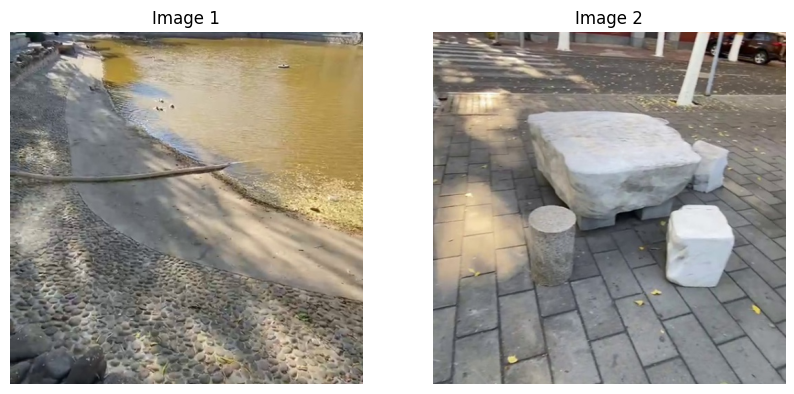

In [5]:
import helpers

print(len(image_pairs))
helpers.show_image_pair(image_pairs[74][0], image_pairs[0][1])

In [6]:
df = pd.DataFrame(columns=Metrics.PANDAS_COLUMNS)

In [7]:
import torch


metrics_dict: dict[tuple[DetectorType, ComposerType], Metrics] = {}
for (detector, composition), stitcher in (stitchers_dictionary.items()):
    i = 0
    print(f"{detector.name+composition.name}: \n")
    general_metrics = Metrics()
    for (img1, img2) in image_pairs:
        torch.cuda.empty_cache()
        print(i)
        i += 1
        metrics = Metrics()
        result = stitcher.stitch(img1, img2, metrics)
        # print(metrics.time_taken)
        if result != None:
            df = pd.concat([df, metrics.to_pandas_df(f"{detector}+{composition}")], ignore_index=True)
    
    print(f"Success rate: {i / len(image_pairs) * 100} %")
    # print("Warp metrics:", general_metrics.warp_metrics)
    # print("Matching metrics:", general_metrics.matching_metrics)
    # print("Average time", general_metrics.time_taken)


LoFTRComplexAlpha: 

0
[[[-277.75406   -22.742863]]

 [[-268.46286   684.5809  ]]

 [[ 358.9039    469.1199  ]]

 [[ 333.10745    -5.733936]]]
1


C:\Users\pavlo.butenko\AppData\Local\Temp\ipykernel_48004\469928076.py:17: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, metrics.to_pandas_df(f"{detector}+{composition}")], ignore_index=True)


[[[118.480415  30.798712]]

 [[148.3309   505.46808 ]]

 [[643.4875   530.7564  ]]

 [[624.84125   -9.713568]]]
2
[[[-199.82204   -23.151415]]

 [[-216.95483   554.20953 ]]

 [[ 333.5667    495.7753  ]]

 [[ 341.41196    10.867485]]]
3
[[[118.68104   45.403263]]

 [[128.83064  505.3881  ]]

 [[698.0331   569.48175 ]]

 [[660.68     -49.372734]]]
4
[[[-845.0572   -271.22253 ]]

 [[-737.39325   806.65753 ]]

 [[ 197.27861   429.67053 ]]

 [[ 184.99654    -6.661014]]]
5
[[[-117.63941     8.94626 ]]

 [[-131.44089   652.3965  ]]

 [[ 499.7316    574.3124  ]]

 [[ 461.73828    10.113699]]]
6
[[[-362.93448    -8.348956]]

 [[-352.52823   597.89844 ]]

 [[ 234.90154   521.59656 ]]

 [[ 215.38368    22.889568]]]
7
[[[214.63876    9.928904]]

 [[211.89833  495.42877 ]]

 [[775.4051   582.1435  ]]

 [[769.9313   -16.31912 ]]]
8
[[[-150.99683   -20.224174]]

 [[-143.26491   531.1932  ]]

 [[ 380.89572   486.27866 ]]

 [[ 382.04224    -1.100626]]]
9
[[[ 49.394024    3.9884698]]

 [[ 49.944893  493

C:\Users\pavlo.butenko\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\pavlo.butenko\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


(512, 512, 3) (512, 512, 3)
1
(512, 512, 3) (512, 512, 3)
2
(512, 512, 3) (512, 512, 3)
3
(512, 512, 3) (512, 512, 3)
4
(512, 512, 3) (512, 512, 3)
5
(512, 512, 3) (512, 512, 3)
6
(512, 512, 3) (512, 512, 3)
7
(512, 512, 3) (512, 512, 3)
8
(512, 512, 3) (512, 512, 3)
9
(512, 512, 3) (512, 512, 3)
10
(512, 512, 3) (512, 512, 3)
11
(512, 512, 3) (512, 512, 3)
12
(512, 512, 3) (512, 512, 3)
13
(512, 512, 3) (512, 512, 3)
14
(512, 512, 3) (512, 512, 3)
15
(512, 512, 3) (512, 512, 3)
16
(512, 512, 3) (512, 512, 3)
17
(512, 512, 3) (512, 512, 3)
18
(512, 512, 3) (512, 512, 3)
19
(512, 512, 3) (512, 512, 3)
20
(512, 512, 3) (512, 512, 3)
21
(512, 512, 3) (512, 512, 3)
22
(512, 512, 3) (512, 512, 3)
23
(512, 512, 3) (512, 512, 3)
24
(512, 512, 3) (512, 512, 3)
25
(512, 512, 3) (512, 512, 3)
26
(512, 512, 3) (512, 512, 3)
27
(512, 512, 3) (512, 512, 3)
28
(512, 512, 3) (512, 512, 3)
29
(512, 512, 3) (512, 512, 3)
30
(512, 512, 3) (512, 512, 3)
31
(512, 512, 3) (512, 512, 3)
32
(512, 512, 3) (51

In [13]:
result = df[(df["metrics_name"] == "time_taken") & (df["metrics_type"] == "time")].groupby(["model", "metrics_type", "metrics_name"], as_index=False)["value"].mean().sort_values(by="value", ascending=False)

result

,model,metrics_type,metrics_name,value
7,DetectorType.UDIS2+ComposerType.UDIS2,time,time_taken,1.185031
6,DetectorType.UDIS2+ComposerType.ComplexAlpha,time,time_taken,1.045039
1,DetectorType.AdaMatcher+ComposerType.UDIS2,time,time_taken,0.807240
3,DetectorType.LoFTR+ComposerType.UDIS2,time,time_taken,0.546935
0,DetectorType.AdaMatcher+ComposerType.ComplexAlpha,time,time_taken,0.435101
2,DetectorType.LoFTR+ComposerType.ComplexAlpha,time,time_taken,0.363833
5,DetectorType.SIFT+ComposerType.UDIS2,time,time_taken,0.296133
4,DetectorType.SIFT+ComposerType.ComplexAlpha,time,time_taken,0.108793


In [15]:
result2 = df[(df["metrics_name"] == "time_taken") & (df["metrics_type"] == "time")].groupby(["model", "metrics_type", "metrics_name"], as_index=False)["value"].agg(['min', 'max', 'mean']).sort_values(by="mean", ascending=False)

result2
df.columns
df_copy = df.copy()

df_copy["model"] = df_copy["model"].str.strip().replace({"DetectorType.": "", "ComposerType.": ""}, regex=True)
# print(df_copy)

df_copy.dropna()

df_copy.to_csv('udis.csv', index=False)

result2

,model,metrics_type,metrics_name,min,max,mean
7,DetectorType.UDIS2+ComposerType.UDIS2,time,time_taken,1.111811,1.393863,1.185031
6,DetectorType.UDIS2+ComposerType.ComplexAlpha,time,time_taken,0.967286,2.016582,1.045039
1,DetectorType.AdaMatcher+ComposerType.UDIS2,time,time_taken,0.483430,1.754805,0.807240
3,DetectorType.LoFTR+ComposerType.UDIS2,time,time_taken,0.443501,0.690386,0.546935
0,DetectorType.AdaMatcher+ComposerType.ComplexAlpha,time,time_taken,0.282724,1.068678,0.435101
2,DetectorType.LoFTR+ComposerType.ComplexAlpha,time,time_taken,0.280800,0.764977,0.363833
5,DetectorType.SIFT+ComposerType.UDIS2,time,time_taken,0.209086,0.623444,0.296133
4,DetectorType.SIFT+ComposerType.ComplexAlpha,time,time_taken,0.049592,0.330364,0.108793


(5, 2) (5, 2)
None


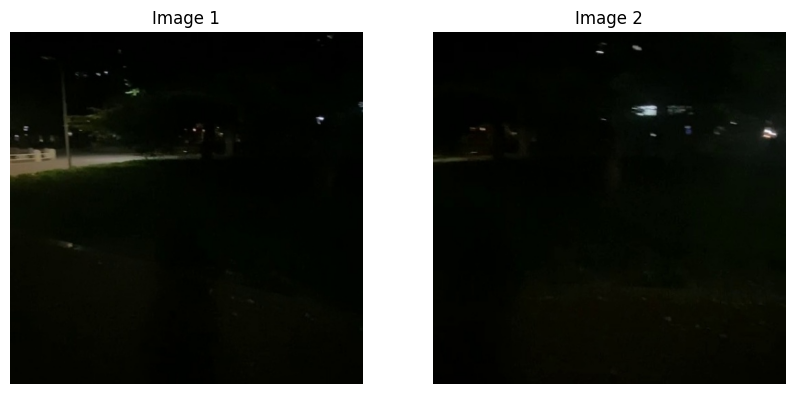

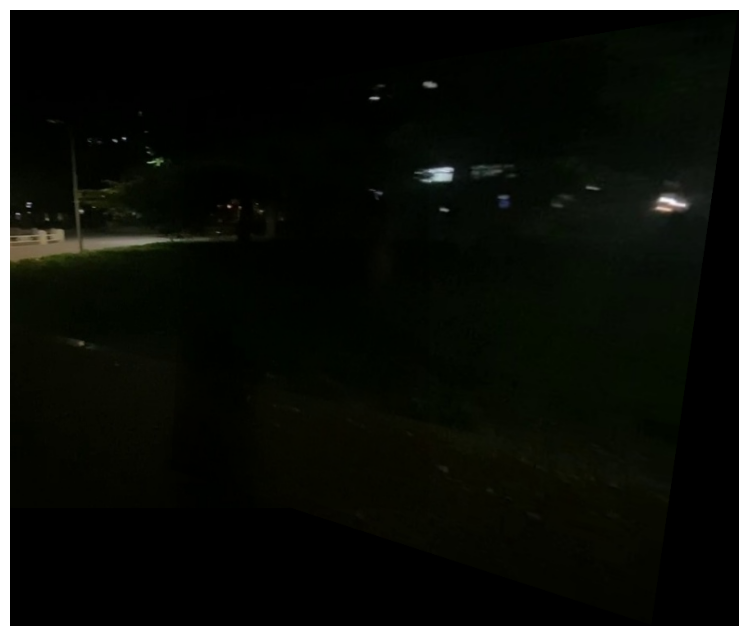

In [19]:
from warp_composer import DetectorFreeModel, DetectorFreeWarper, UDIS2Warper

images = image_pairs[91]

helpers.show_image_pair(images[0], images[1])
img1 = images[0].copy()
img2 = images[1].copy()

# img1 = cv2.resize(img1, (288, 512))
# img2 = cv2.resize(img2, (288, 512))

# img1 = cv2.cvtColor(img1, cv2.COLOR_RGB2GRAY)
# img2 = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)
metrics = None
# result = ImageStitcher(DetectorType.SIFT, ComposerType.ComplexAlpha, EnvironmentType.Outdoor).stitch(img1, img2, metrics)

keypoints1, descriptors1 = cv2.SIFT.create().detectAndCompute(img1, None)
keypoints2, descriptors2 = cv2.SIFT.create().detectAndCompute(img2, None)

matches = cv2.BFMatcher.create().knnMatch(descriptors2, descriptors1, k = 2)

good_matches = []

for m,n in matches:
    if m.distance < 0.75 * n.distance:
        good_matches.append(m)

        # print('Good matches:', len(good_matches))
        # if len(good_matches) > self.MIN_MATCH_COUNT:

src_pts = np.float32([keypoints1[m.trainIdx].pt for m in good_matches])
dst_pts = np.float32([keypoints2[m.queryIdx].pt for m in good_matches])

print(src_pts.shape, dst_pts.shape)


H, _ = cv2.findHomography(np.array(dst_pts), np.array(src_pts), cv2.RANSAC, 5.0)

print(H)

helpers.show_image(result[0].astype(np.uint8))
# overlap_mask = cv2.bitwise_and(src_mask, dst_mask).astype(np.uint8)
# contours, _ = cv2.findContours(cv2.cvtColor(overlap_mask, cv2.COLOR_RGB2GRAY), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# mainContour = contours[0]
# o_x, o_y, o_w, o_h = cv2.boundingRect(mainContour)
# print(o_x, o_y, o_w, o_h)
# helpers.show_image(overlap_mask[o_y:(o_y + o_h), o_x:(o_x+o_w)])
# helpers.show_image_pair(warp1.astype(np.uint8), warp2.astype(np.uint8))


In [ ]:
from sklearn import metrics

def get_matching_metrics(keypoints1: np.array, keypoints2: np.array, auc_thresholds: np.array) -> dict[str, float]:
        keypoints1_cp = np.array(keypoints1)
        keypoints2_cp = np.array(keypoints2)

        H, _ = cv2.findHomography(keypoints2_cp, keypoints1_cp, cv2.RANSAC)

        pts2_proj = cv2.perspectiveTransform(keypoints2_cp.reshape(-1, 1, 2), H).reshape(-1, 2)
        reprojection_error = np.linalg.norm(keypoints1_cp - pts2_proj, axis=1)

        inliers = [np.mean(reprojection_error <= t) for t in auc_thresholds]
        print("inliers:", inliers)
        area_under_curve = metrics.auc(auc_thresholds, inliers)
        return area_under_curve

In [ ]:
from match_finders import LoFTRMatchFinder


keypoints1, keypoints2 = SiftMatchFinder(EnvironmentType.Indoor).find_matches(img1, img2)
metrics = get_matching_metrics(keypoints1, keypoints2, [3, 5, 10])

print(metrics)

inliers: [0.9760589318600368, 0.9864947820748926, 0.9898710865561694]
6.903468385512585
